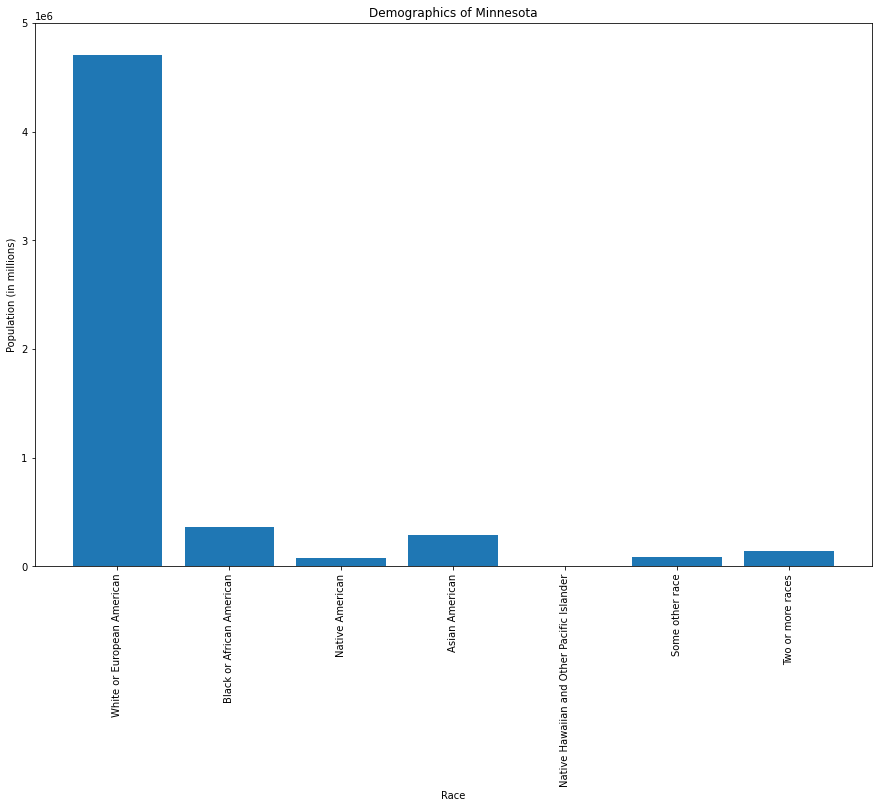

In [3]:
# CSC221-0001, Daniel Hixon, 8 December 2020

# imports
import urllib.request as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# get state URL and open it with BeautifulSoup
url = "https://en.wikipedia.org/wiki/Minnesota"
page = req.urlopen(url)
soup = BeautifulSoup(page, "lxml")

# find the correct table (in this case the demographics of Minnesota)
all_sortable_tables = soup.find_all('table', class_='wikitable sortable collapsible nowrap')
right_table = all_sortable_tables[0]

# scrape data from the table
A = []
B = []
C = []
count = 0
for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 3:
        if count != 0: # I added this so it would omit the unnecessary "Total Population" row
            A.append(cells[0].find(text=True))
            B.append(cells[1].find(text=True))
            C.append(cells[2].find(text=True).strip())
        count += 1
        
# create a DataFrame from the table data        
df = pd.DataFrame(A, columns=['Race'])
count = 0
for value in B: # this part is to fix the population data and make it actual integers
    fix = str(value)
    fix = int(fix.replace(',', ''))
    B[count] = fix
    count += 1
df['Population'] = B
df['Percentage'] = C

# plot the data
plt.figure(figsize=(15,10))
plt.bar(np.arange(0, len(df['Population'])), df['Population'])
plt.xticks(np.arange(0, len(df['Race'])), df['Race'], rotation = 90)
plt.ylim(0, 5000000)
plt.xlabel("Race")
plt.ylabel("Population (in millions)")
plt.title("Demographics of Minnesota")
plt.show()